In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st
import os

In [4]:
cwd = os.getcwd()

In [5]:
data_files = os.listdir(os.path.join(cwd, 'data'))
print(data_files)
dfs = {}

# For each file in data_files, make into a dataframe and run df.head()

for file in data_files:
    file_path = os.path.join(cwd, 'data', file)
    if file.endswith('.csv'):
        fn = file.split('.csv')[0]
        dfs[f'{fn}'] = pd.read_csv(file_path)
        print(f"DataFrame for {file}:")
        print(dfs[fn].shape)
        # print(df.head())
    elif file.endswith('.xlsx'):
        df = pd.read_excel(file_path)
        print(f"DataFrame for {file}:")
        # print(df.head())
    else:
        print(f"Unsupported file format for {file}")


['sample_submission.csv', 'test_identity.csv', 'test_transaction.csv', 'train_identity.csv', 'train_transaction.csv']
DataFrame for sample_submission.csv:
(506691, 2)
DataFrame for test_identity.csv:
(141907, 41)
DataFrame for test_transaction.csv:
(506691, 393)
DataFrame for train_identity.csv:
(144233, 41)
DataFrame for train_transaction.csv:
(590540, 394)


In [6]:
dfs.keys()

dict_keys(['sample_submission', 'test_identity', 'test_transaction', 'train_identity', 'train_transaction'])

In [12]:
train = dfs['train_transaction'].merge(dfs['train_identity'], on='TransactionID', how='left')

In [14]:
train.shape

(590540, 434)

In [13]:
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [29]:
train_clean = train.convert_dtypes()

# threshold = int(0.95 * len(train))

threshold = len(train_clean) - int(0.95 * len(train))

train_clean = train_clean.loc[:, train_clean.isnull().sum() < threshold]


In [30]:
np.setdiff1d(train.columns, train_clean.columns)

array(['D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D2', 'D3', 'D4', 'D5',
       'D6', 'D7', 'D8', 'D9', 'DeviceInfo', 'DeviceType', 'M1', 'M2',
       'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain',
       'R_emaildomain', 'V1', 'V10', 'V11', 'V12', 'V13', 'V138', 'V139',
       'V14', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146',
       'V147', 'V148', 'V149', 'V15', 'V150', 'V151', 'V152', 'V153',
       'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V16', 'V160',
       'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168',
       'V169', 'V17', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175',
       'V176', 'V177', 'V178', 'V179', 'V18', 'V180', 'V181', 'V182',
       'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V19',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V2', 'V20', 'V200', 'V201', 'V202', 'V203',
       'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V21', 'V210',
       'V211', '

In [31]:
len(train_clean)

590540

In [32]:
threshold

29527

In [33]:
train_clean.isnull().sum()

TransactionID      0
isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
                  ..
V317              12
V318              12
V319              12
V320              12
V321              12
Length: 112, dtype: int64

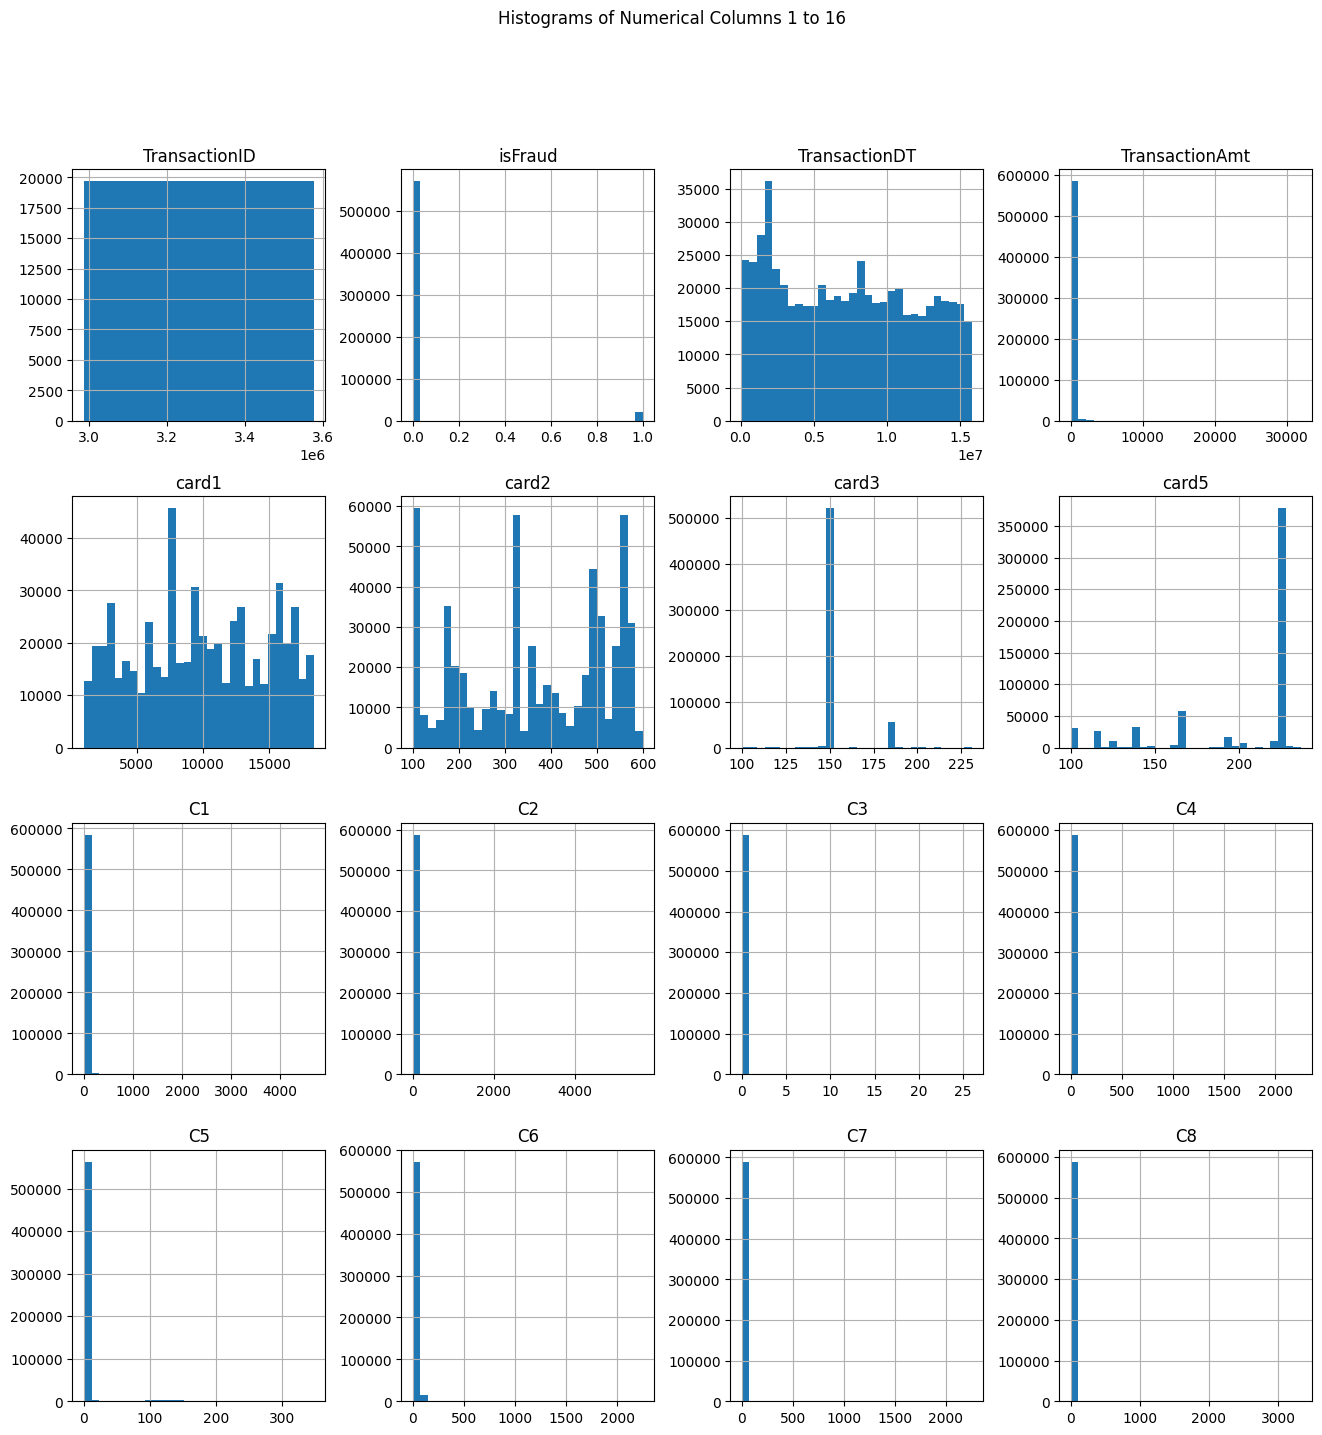

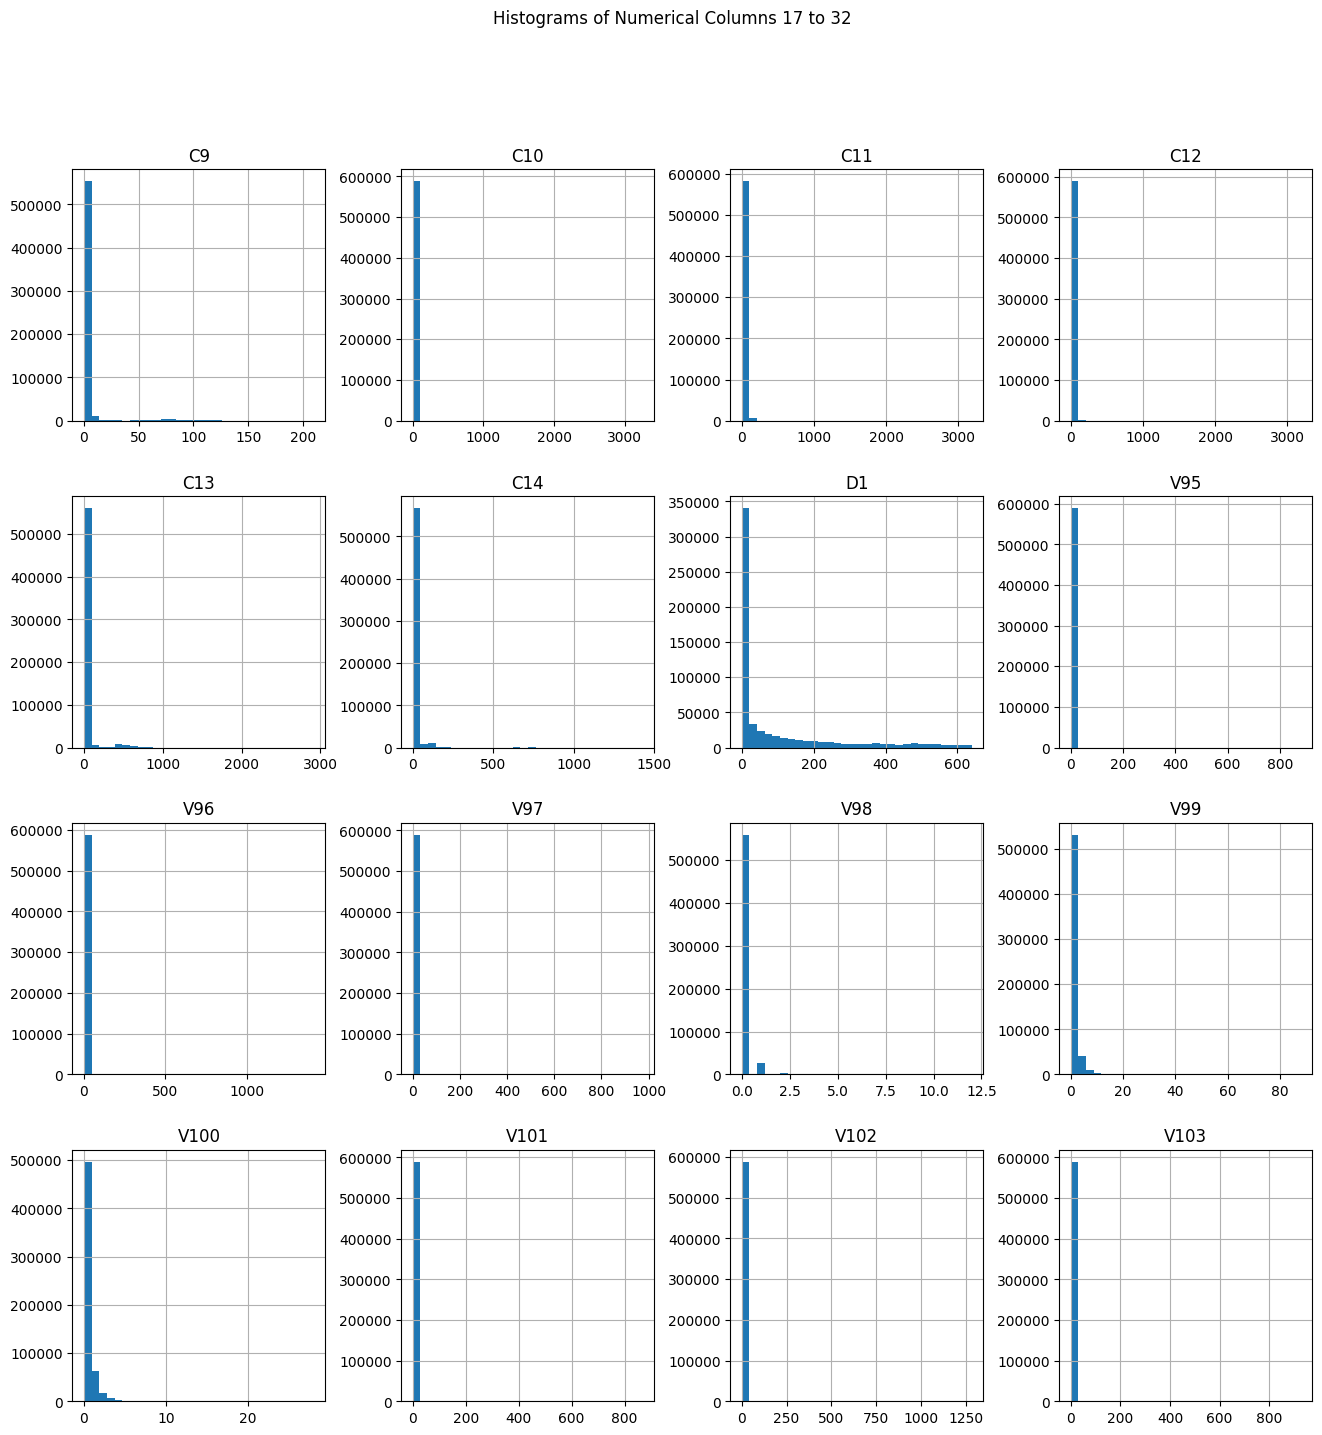

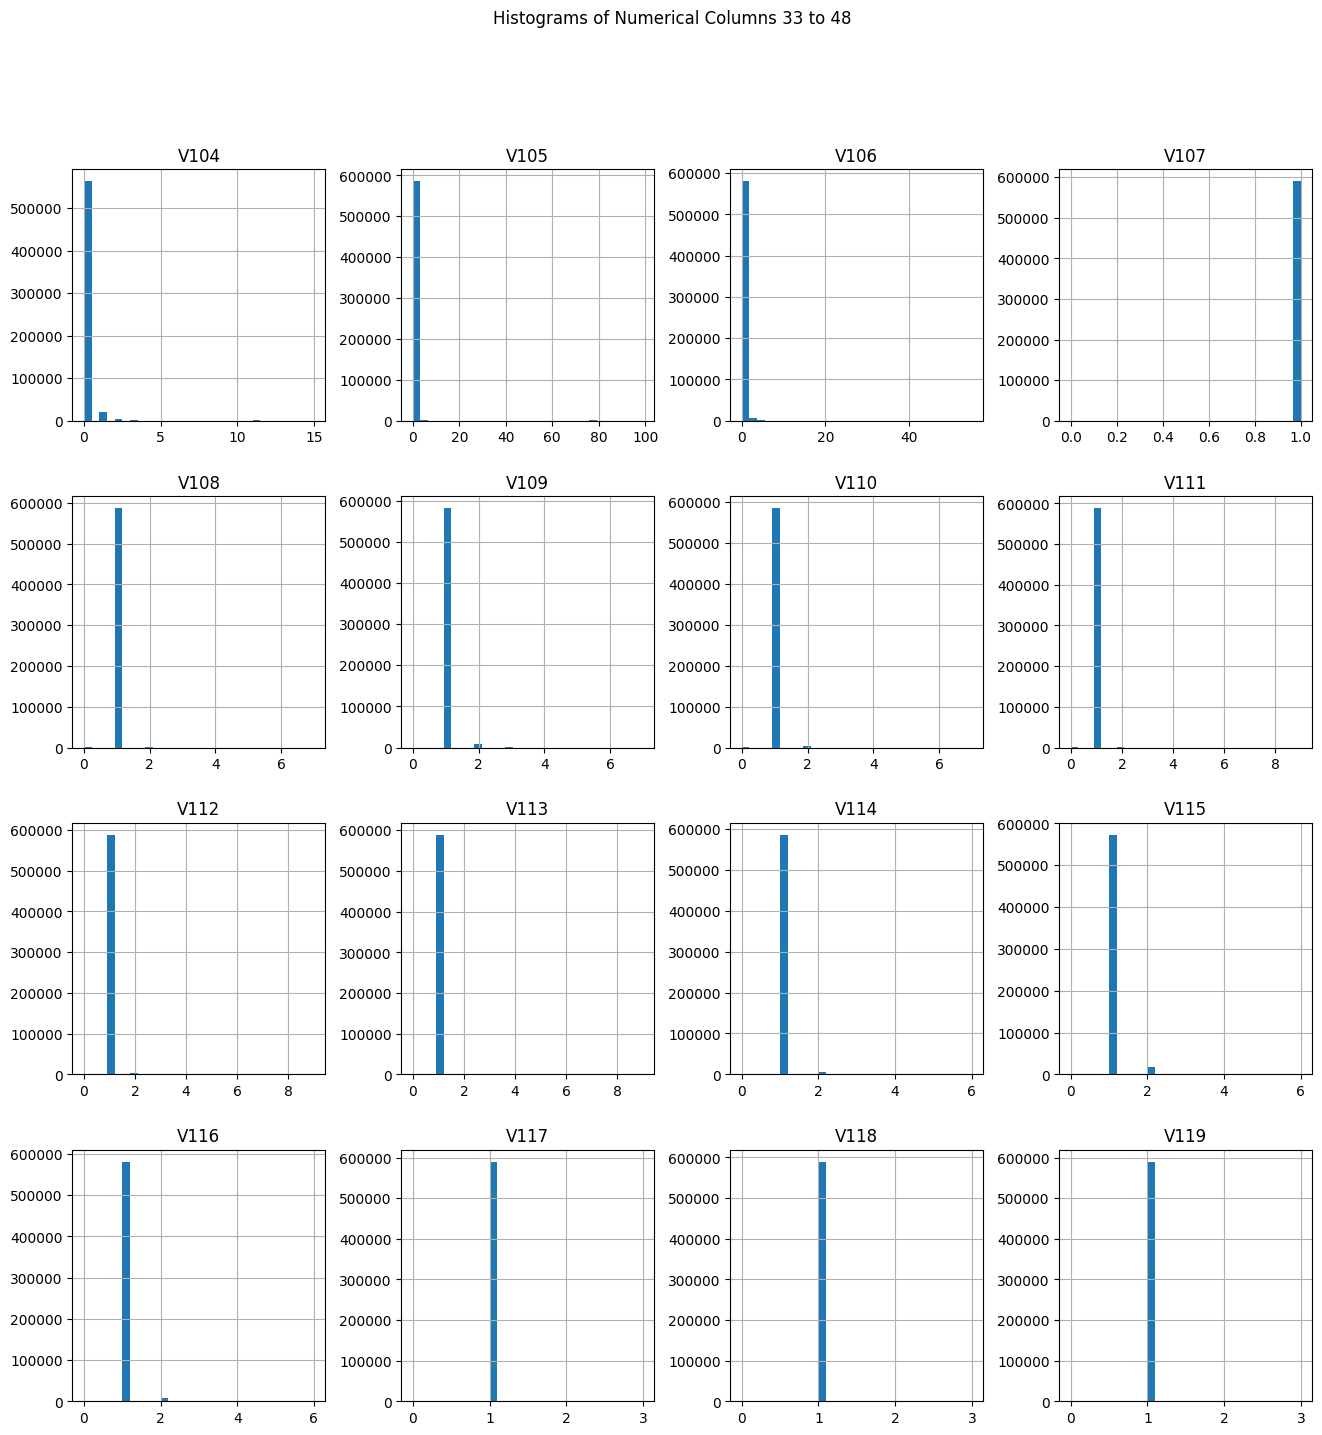

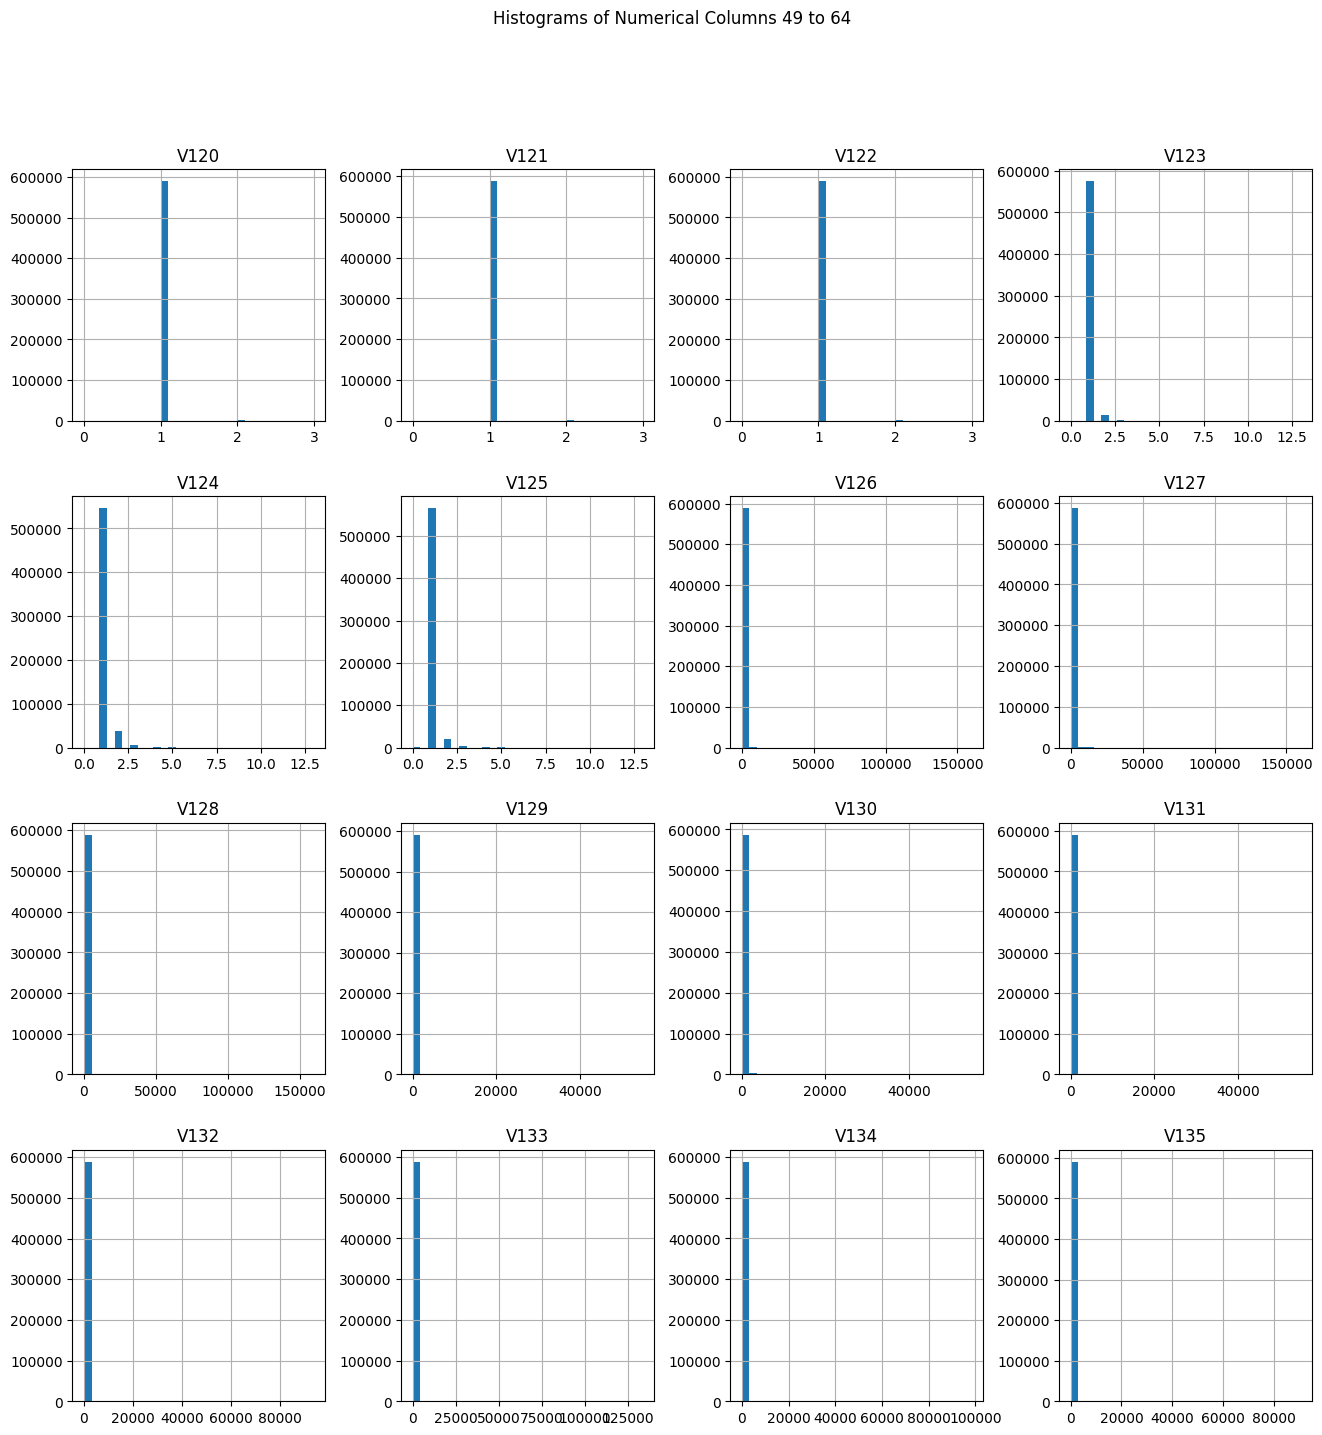

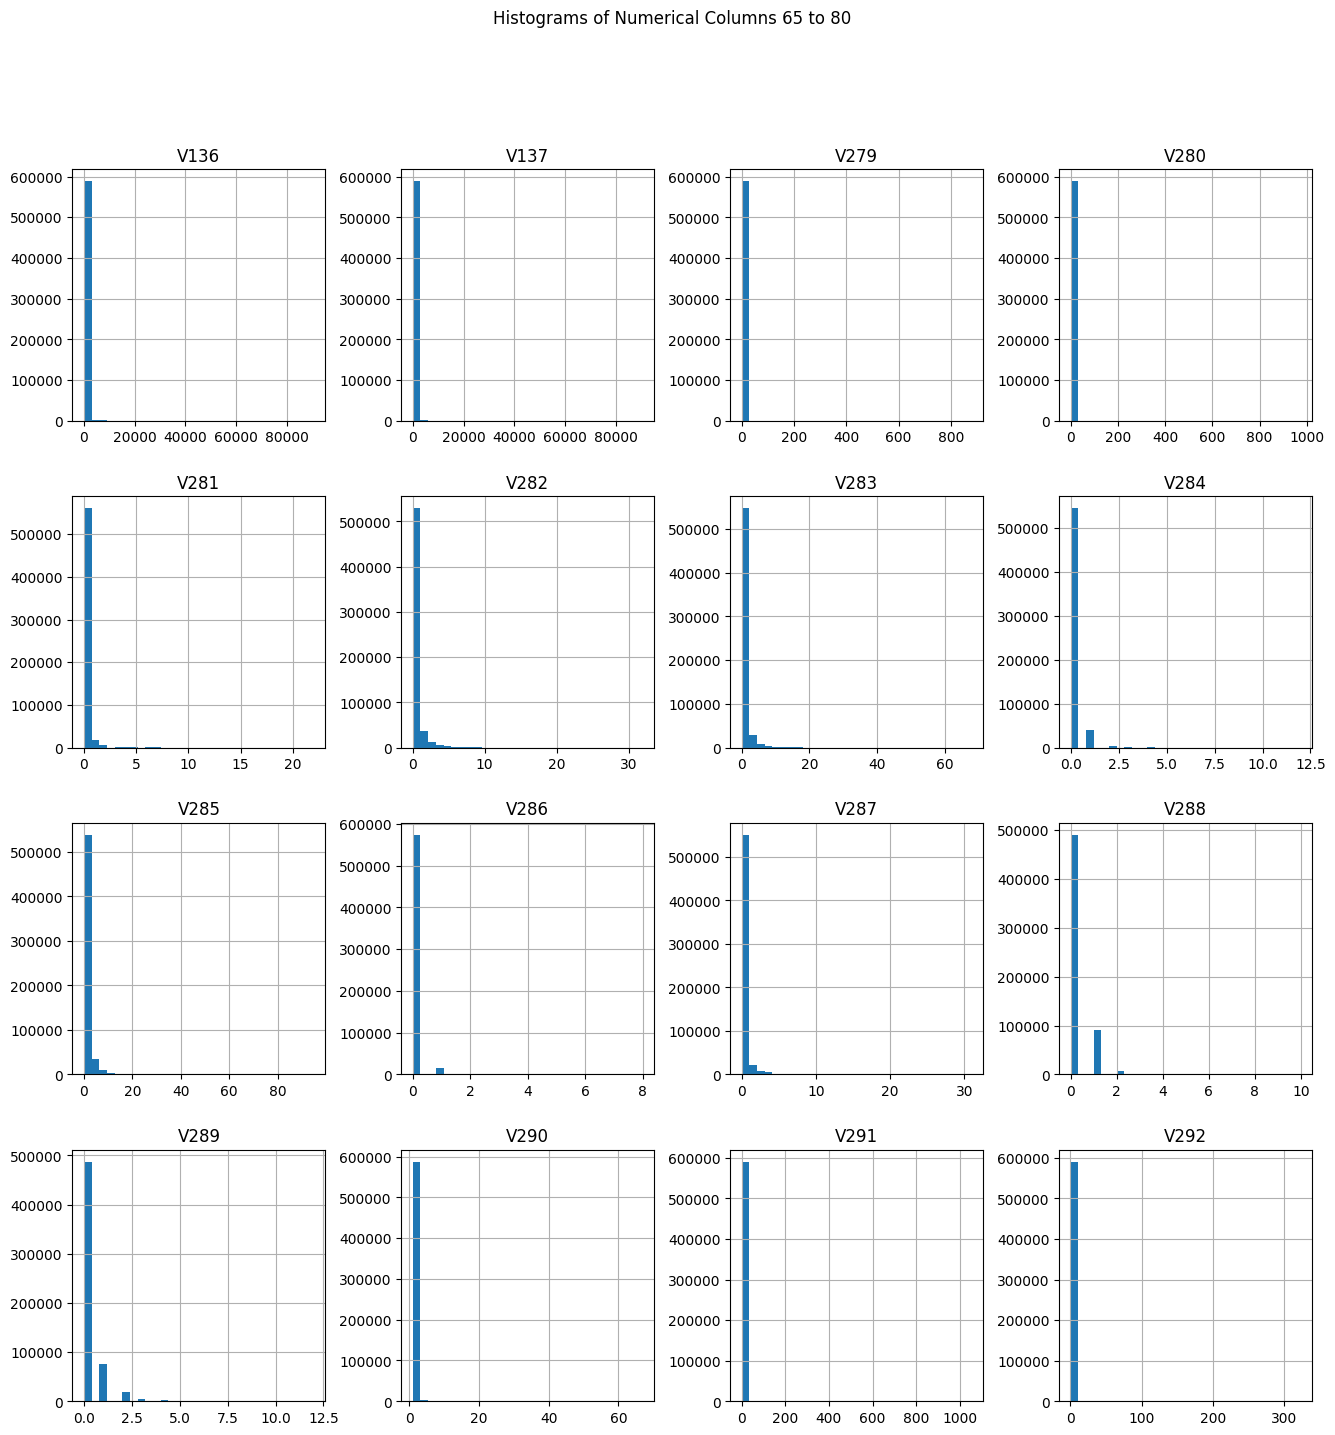

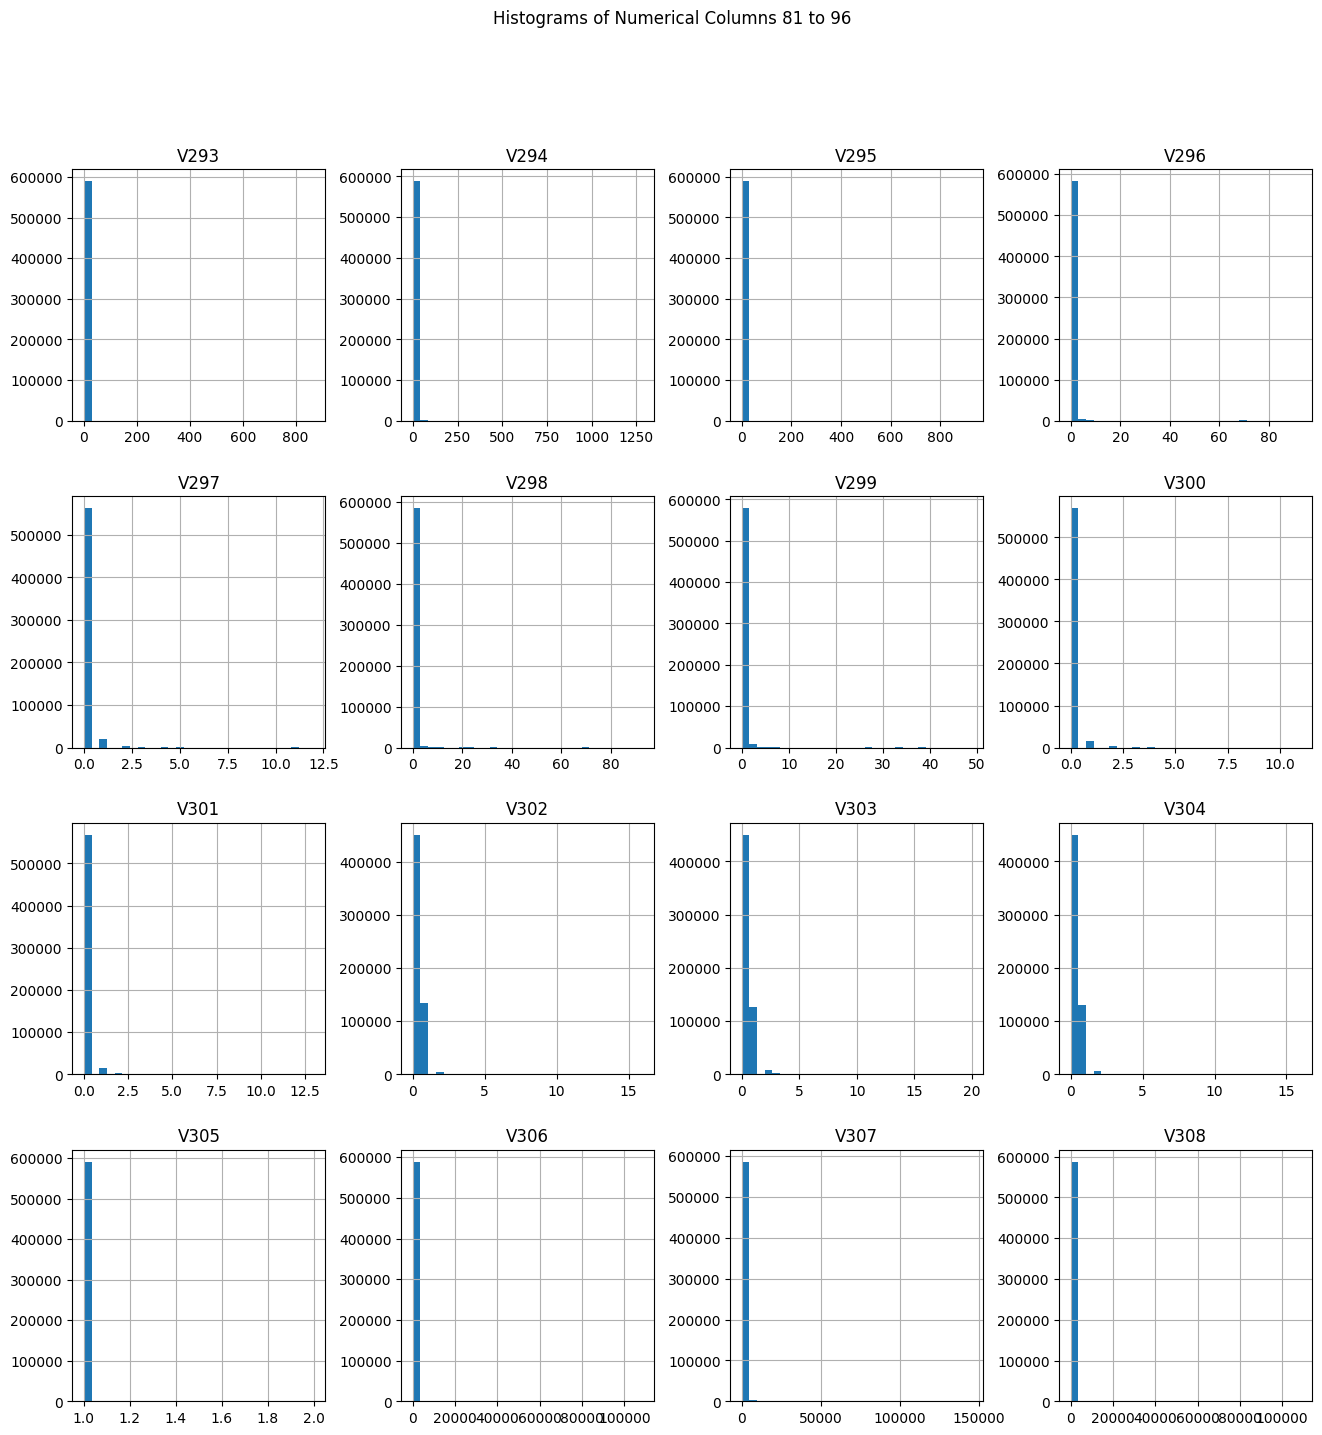

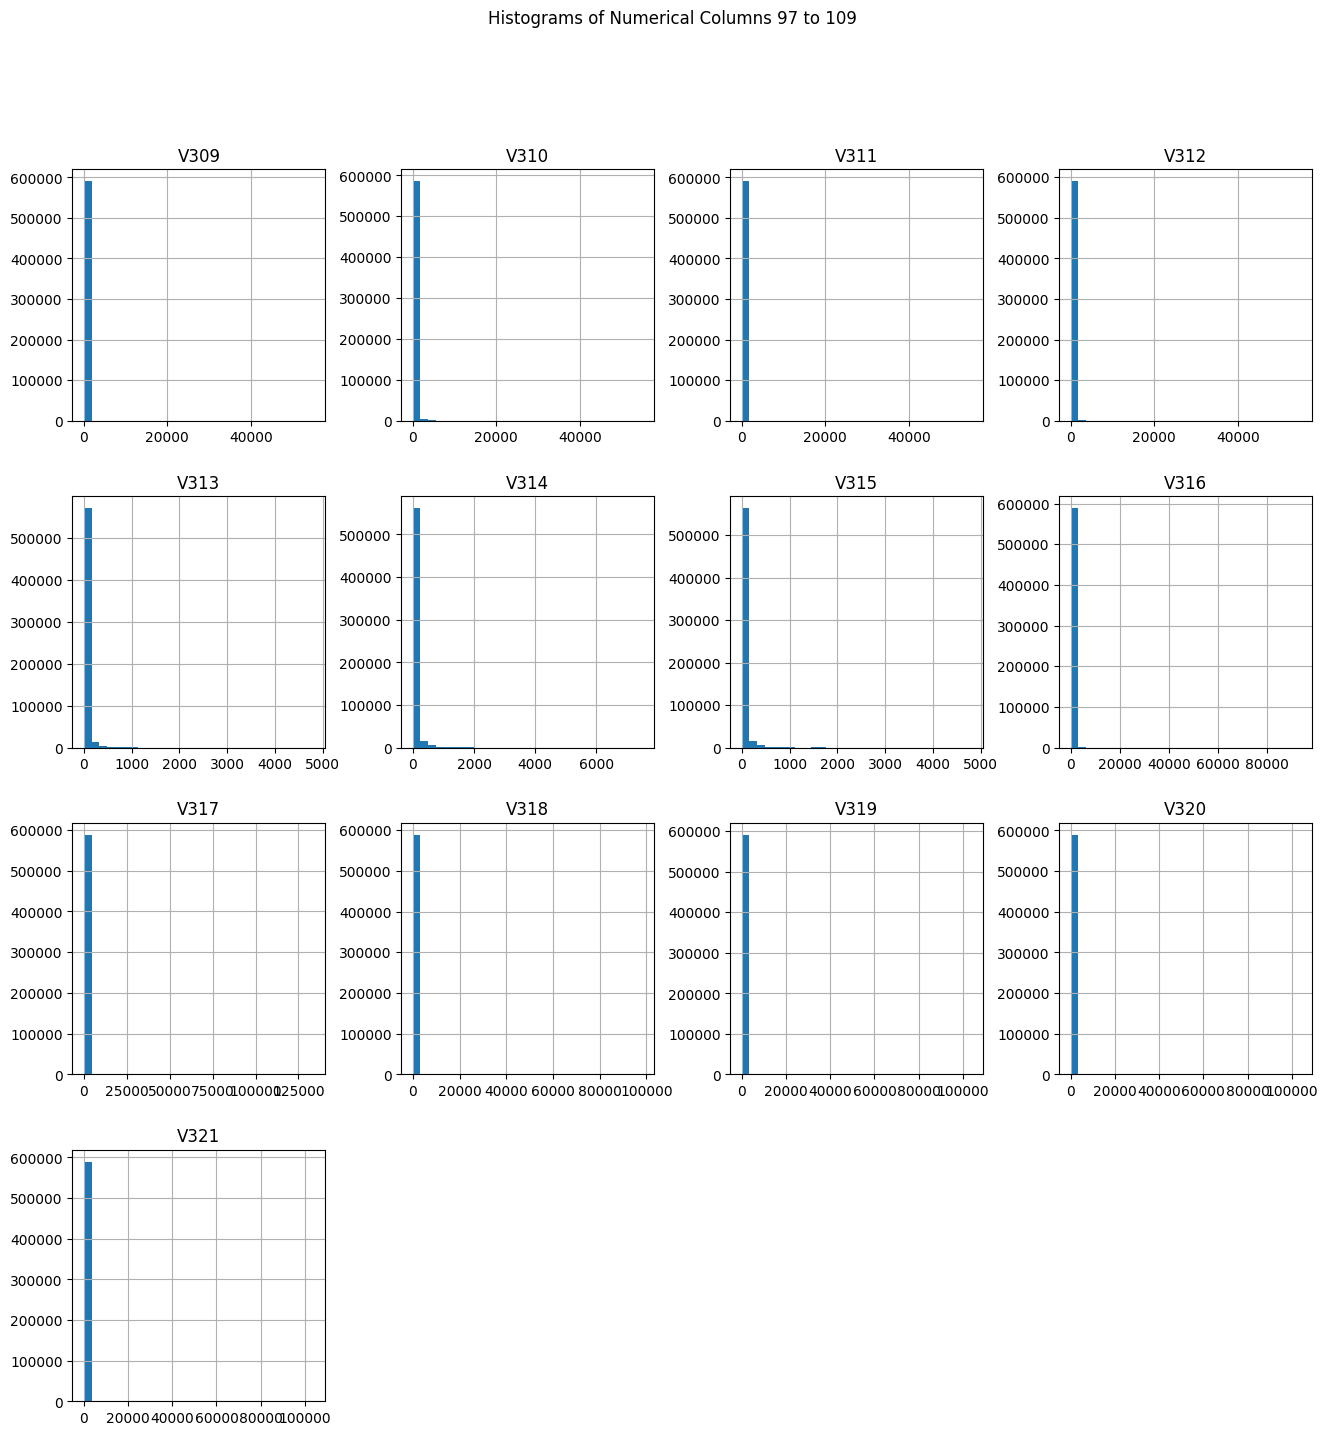

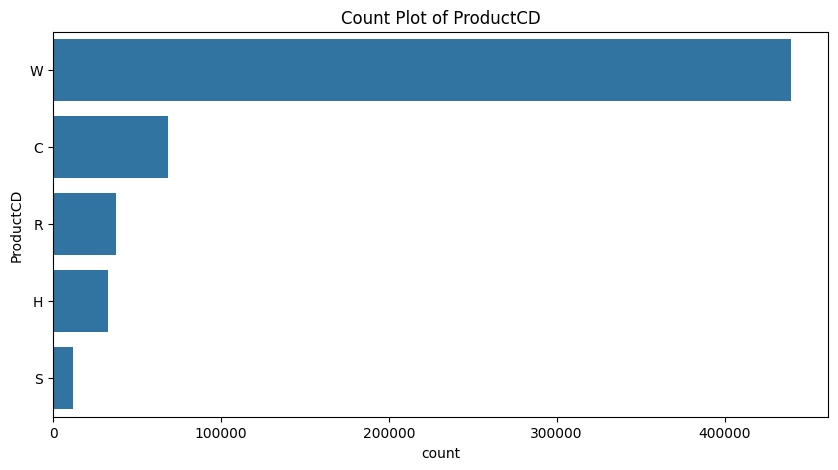

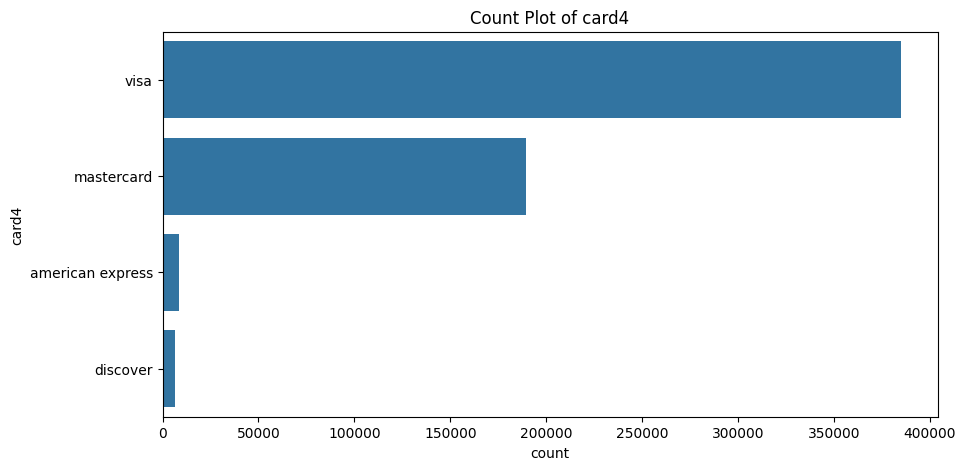

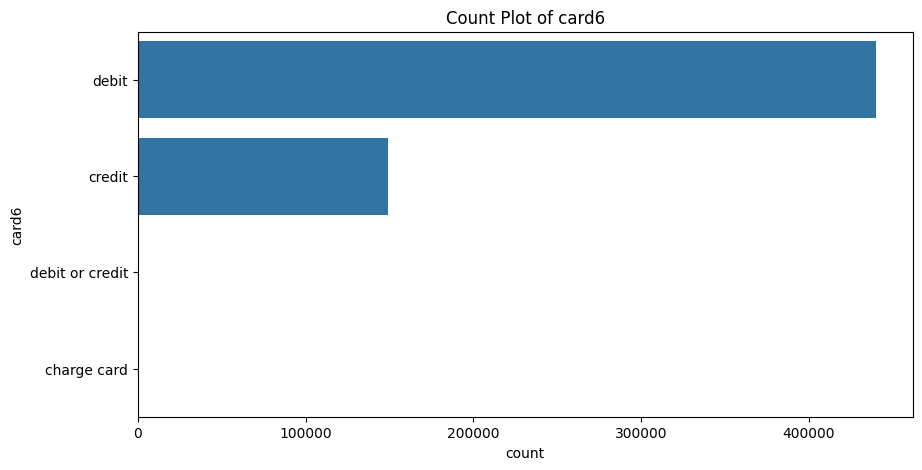

In [37]:
# Histograms for numerical dtypes in batches of 16
numerical_columns = train_clean.select_dtypes(include=['number']).columns
batch_size = 16

for i in range(0, len(numerical_columns), batch_size):
    batch_columns = numerical_columns[i:i + batch_size]
    train_clean[batch_columns].hist(bins=30, figsize=(16, 16))
    plt.suptitle(f'Histograms of Numerical Columns {i + 1} to {i + len(batch_columns)}')
    plt.show()

# Count plots for non-numeric types
non_numerical_columns = train_clean.select_dtypes(exclude=['number']).columns
for column in non_numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=train_clean, order=train_clean[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.show()